In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
path = "src/data/outputs"
plots_path = "src/data/outputs/plots/game_theory/by_game/"
os.makedirs(plots_path, exist_ok=True)

In [3]:
##combine df
#output_path = '/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/combo.csv'
#df1_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/prisoners_dilemma_250309_solved.csv"
#df2_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/generic_250311_solved.csv"
#df3_path = "/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/250331_solved.csv"
#df1 = pd.read_csv(df1_path)
#df2 = pd.read_csv(df2_path)
#df3 = pd.read_csv(df3_path)
##df3 = pd.DataFrame() #TODO: fix dataframe first
#dfs = [df1,df2,df3]
#df = pd.concat(dfs, ignore_index=True)
#df.to_csv(output_path, index=False)

In [4]:
file_name = "by_game.csv"
df = pd.read_csv(os.path.join(path, file_name))
#games_list = ["prisoners_dilemma", "stag_hunt", "generic", "chicken", "hawk_dove"]
#df = df[df['game_name'].isin(games_list)]
#TODO cummulative scores are not working
#convert scores to a list of ints
df['agent_1_scores'] = df['agent_1_scores'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_2_scores'] = df['agent_2_scores'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_1_cumulative_scores'] = df['agent_1_scores'].apply(lambda x: [0] + [sum(x[:i+1]) for i in range(len(x))] if isinstance(x, list) else x)
df['agent_2_cumulative_scores'] = df['agent_2_scores'].apply(lambda x: [0] + [sum(x[:i+1]) for i in range(len(x))] if isinstance(x, list) else x)

#parse as lists, something went wrong when saving the csv
df['truthful_agent_1'] = df['truthful_agent_1'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['truthful_agent_2'] = df['truthful_agent_2'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Parse the actions as lists of strings
df['agent_1_actions'] = df['agent_1_actions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_2_actions'] = df['agent_2_actions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_1_messages'] = df['agent_1_messages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['agent_2_messages'] = df['agent_2_messages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['intent_agent_1'] = df['intent_agent_1'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['intent_agent_2'] = df['intent_agent_2'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df = df.rename(columns={'game_name': 'GameName'})

# Create a new DataFrame with one row per agent
df_agent1 = df.copy()
df_agent2 = df.copy()

# Add a column to indicate the agent
df_agent1['Agent'] = 'Agent 1'
df_agent2['Agent'] = 'Agent 2'
# Rename columns to remove agent-specific prefixes
df_agent1 = df_agent1.rename(columns={
    'personality_1': 'Personality',
    'agent_1_scores': 'Scores',
    'agent_1_messages': 'Messages',
    'agent_1_actions': 'Actions',
    'agent_1_cumulative_scores': 'CumulativeScores',
    'intent_agent_1': 'Intent',
    'truthful_agent_1': 'Truthful',
    'analysis_agent_1': 'Analysis'
})

df_agent2 = df_agent2.rename(columns={
    'personality_2': 'Personality',
    'agent_2_scores': 'Scores',
    'agent_2_messages': 'Messages',
    'agent_2_actions': 'Actions',
    'agent_2_cumulative_scores': 'CumulativeScores',
    'intent_agent_2': 'Intent',
    'truthful_agent_2': 'Truthful',
    'analysis_agent_2': 'Analysis'
})

# Remove the other columns
df_agent1 = df_agent1.drop(columns=[
    'personality_2', 'agent_2_scores', 'agent_2_messages', 'agent_2_actions', 
    'agent_2_cumulative_scores', 'intent_agent_2', 'truthful_agent_2', 'analysis_agent_2'
])
df_agent2 = df_agent2.drop(columns=[
    'personality_1', 'agent_1_scores', 'agent_1_messages', 'agent_1_actions', 
    'agent_1_cumulative_scores', 'intent_agent_1', 'truthful_agent_1', 'analysis_agent_1'
])

# Combine the two DataFrames
df_agents = pd.concat([df_agent1, df_agent2], ignore_index=True)

nonmbti = ['NONE', 'ALTRUISTIC', 'SELFISH']
# Map each personality to its dichotomies
df_agents['I/E'] = df_agents['Personality'].apply(lambda x: 'I' if x[0] == 'I' else 'E' if x not in nonmbti else None)
df_agents['N/S'] = df_agents['Personality'].apply(lambda x: 'N' if x[1] == 'N' else 'S' if x not in nonmbti else None)
df_agents['T/F'] = df_agents['Personality'].apply(lambda x: 'T' if x[2] == 'T' else 'F' if x not in nonmbti else None)
df_agents['J/P'] = df_agents['Personality'].apply(lambda x: 'J' if x[3] == 'J' else 'P' if x not in nonmbti else None)

df_agents["TotalScore"] = df_agents["CumulativeScores"].apply(lambda x: x[-1])
df_agents["Truthfullness"] = df_agents["Truthful"].apply(lambda x: sum(x)/len(x) if len(x) > 0 else 0)

#total cost USD
print(df_agents['total_cost_USD'].sum())

df_agents.head()
#df_agents.to_csv("/cluster/home/mlindner/Github/master_thesis_project/src/data/outputs/plots/stability_PD/stability_PD.csv", index=False)

11.654164199999887


,GameName,model_name_2,model_name_1,Personality,Scores,Messages,Actions,total_rounds,total_tokens,total_cost_USD,...,model_provider_1,model_provider_2,CumulativeScores,Agent,I/E,N/S,T/F,J/P,TotalScore,Truthfullness
0,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[1, 1, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[defect, defect, defect, defect, defect, defec...",7,17054,0.002785,...,NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7]",Agent 1,None,None,None,None,7,0.000000
1,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[1, 1, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[defect, defect, defect, defect, defect, defec...",7,28324,0.003758,...,NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7]",Agent 1,None,None,None,None,7,0.000000
2,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[3, 5, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[cooperate, defect, defect, defect, defect, de...",7,30393,0.003992,...,NaN,NaN,"[0, 3, 8, 9, 10, 11, 12, 13]",Agent 1,None,None,None,None,13,0.714286
3,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[5, 5, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[defect, defect, defect, defect, defect, defec...",7,29955,0.003929,...,NaN,NaN,"[0, 5, 10, 11, 12, 13, 14, 15]",Agent 1,None,None,None,None,15,0.714286
4,prisoners_dilemma,gpt-4o-mini,gpt-4o-mini,NONE,"[1, 1, 1, 1, 1, 1, 1]",[Let's both cooperate this round for mutual be...,"[defect, defect, defect, defect, defect, defec...",7,26657,0.003805,...,NaN,NaN,"[0, 1, 2, 3, 4, 5, 6, 7]",Agent 1,None,None,None,None,7,0.000000


/tmp/ipykernel_733440/1004354430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='I/E', y='TotalScore', data=df_agents, ax=axs[0, 0], palette='Set2')
/tmp/ipykernel_733440/1004354430.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='N/S', y='TotalScore', data=df_agents, ax=axs[0, 1], palette='Set2')
/tmp/ipykernel_733440/1004354430.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='T/F', y='TotalScore', data=df_agents, ax=axs[1, 0], palette='Set2')
/tmp/ipykernel_733440/1004354430.py:10: FutureWarning: 

Passing `pale

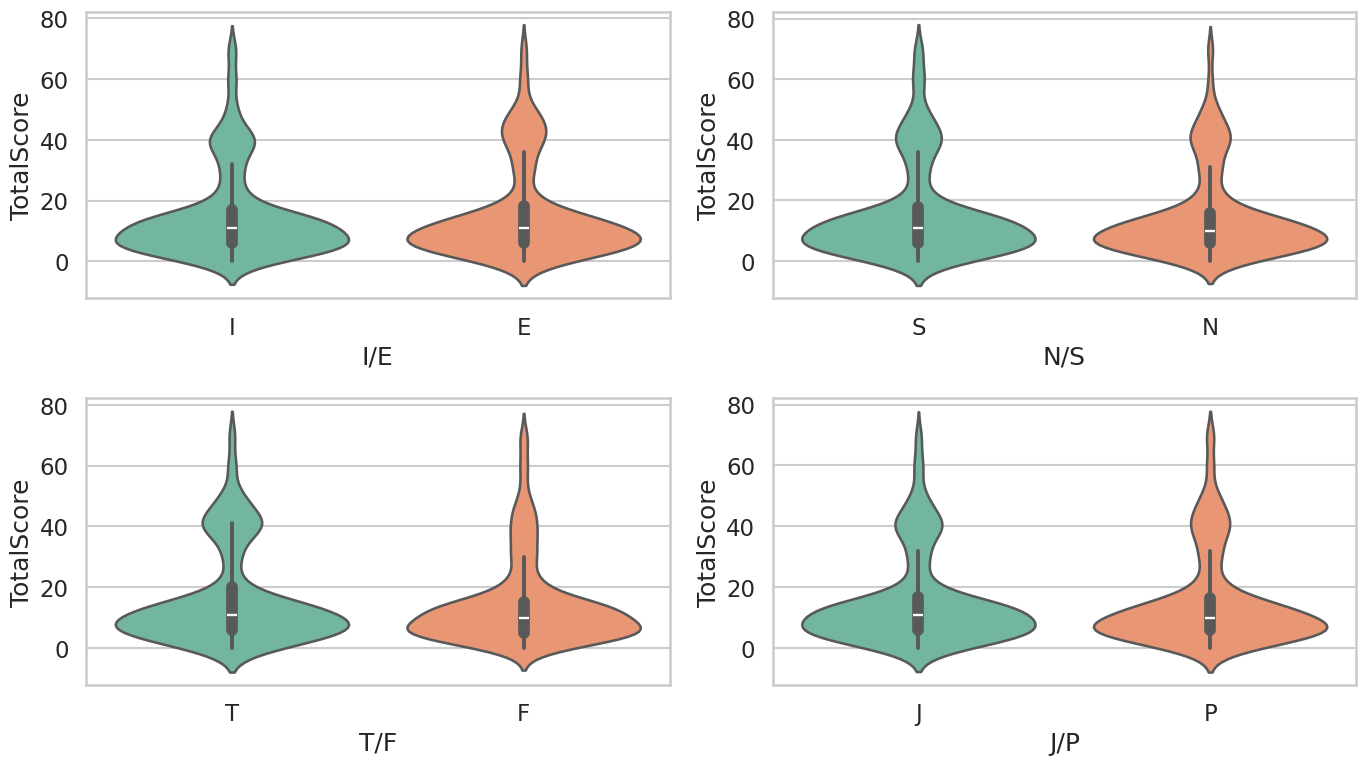

In [12]:
sns.set(style="whitegrid")
sns.set_context("talk")

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Use Set2 palette for each violin plot
sns.violinplot(x='I/E', y='TotalScore', data=df_agents, ax=axs[0, 0], palette='Set2')
sns.violinplot(x='N/S', y='TotalScore', data=df_agents, ax=axs[0, 1], palette='Set2')
sns.violinplot(x='T/F', y='TotalScore', data=df_agents, ax=axs[1, 0], palette='Set2')
sns.violinplot(x='J/P', y='TotalScore', data=df_agents, ax=axs[1, 1], palette='Set2')

plt.tight_layout()
plt.savefig(plots_path + "score_violin_per_dichotomy.png", dpi=300, bbox_inches='tight')
plt.show()


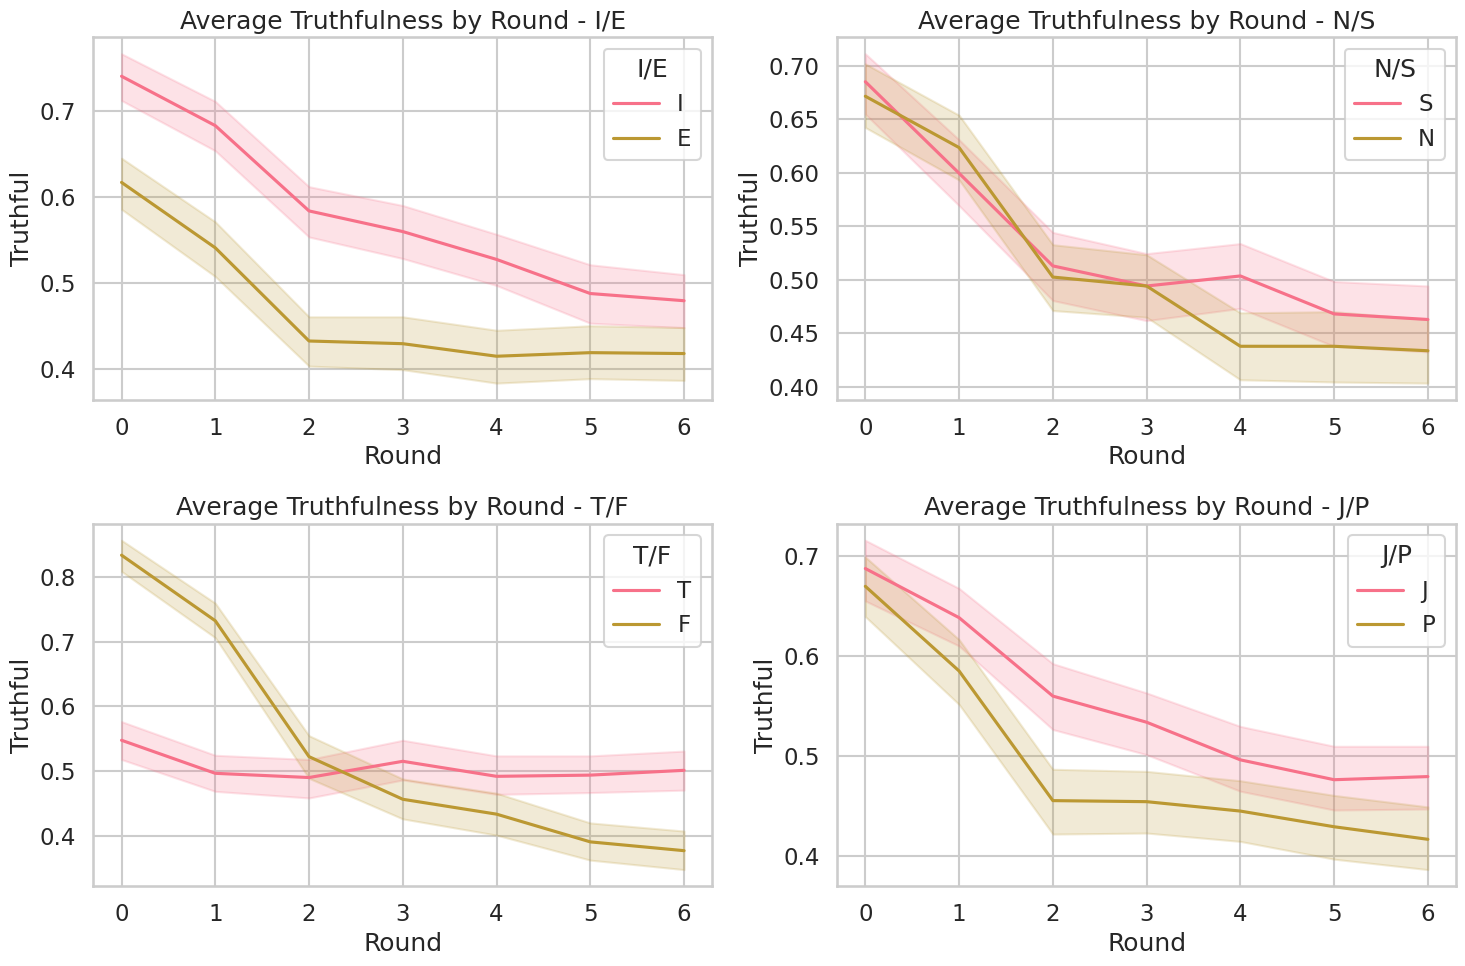

In [6]:
# Prepare the data for plotting
df_agents['Round'] = df_agents['CumulativeScores'].apply(lambda x: list(range(len(x))))
df_agents['TruthfulByRound'] = df_agents.apply(lambda row: list(zip(row['Round'], row['Truthful'])), axis=1)

# Explode the data to have one row per round
df_exploded = df_agents.explode('TruthfulByRound')
df_exploded['Round'] = df_exploded['TruthfulByRound'].apply(lambda x: x[0] if isinstance(x, tuple) else None)
df_exploded['Truthful'] = df_exploded['TruthfulByRound'].apply(lambda x: x[1] if isinstance(x, tuple) else None)

# Filter out rows with missing values
df_exploded = df_exploded.dropna(subset=['Round', 'Truthful'])

# Convert Round to integer for proper sorting
df_exploded['Round'] = df_exploded['Round'].astype(int)

# Plot average truthfulness by round for each dichotomy
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='I/E', ax=axs[0, 0])
axs[0, 0].set_title('Average Truthfulness by Round - I/E')

sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='N/S', ax=axs[0, 1])
axs[0, 1].set_title('Average Truthfulness by Round - N/S')

sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='T/F', ax=axs[1, 0])
axs[1, 0].set_title('Average Truthfulness by Round - T/F')

sns.lineplot(data=df_exploded, x='Round', y='Truthful', hue='J/P', ax=axs[1, 1])
axs[1, 1].set_title('Average Truthfulness by Round - J/P')

plt.tight_layout()
plt.savefig(plots_path + "average_truthfulness_by_round_dichotomy.png")
plt.show()

/tmp/ipykernel_733440/1100140530.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='I/E', y='Truthfullness', data=df_agents, ax=axs[0, 0], palette='Set2')
/tmp/ipykernel_733440/1100140530.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='N/S', y='Truthfullness', data=df_agents, ax=axs[0, 1], palette='Set2')
/tmp/ipykernel_733440/1100140530.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='T/F', y='Truthfullness', data=df_agents, ax=axs[1, 0], palette='Set2')
/tmp/ipykernel_733440/1100140530.py:39: FutureWarning: 

P

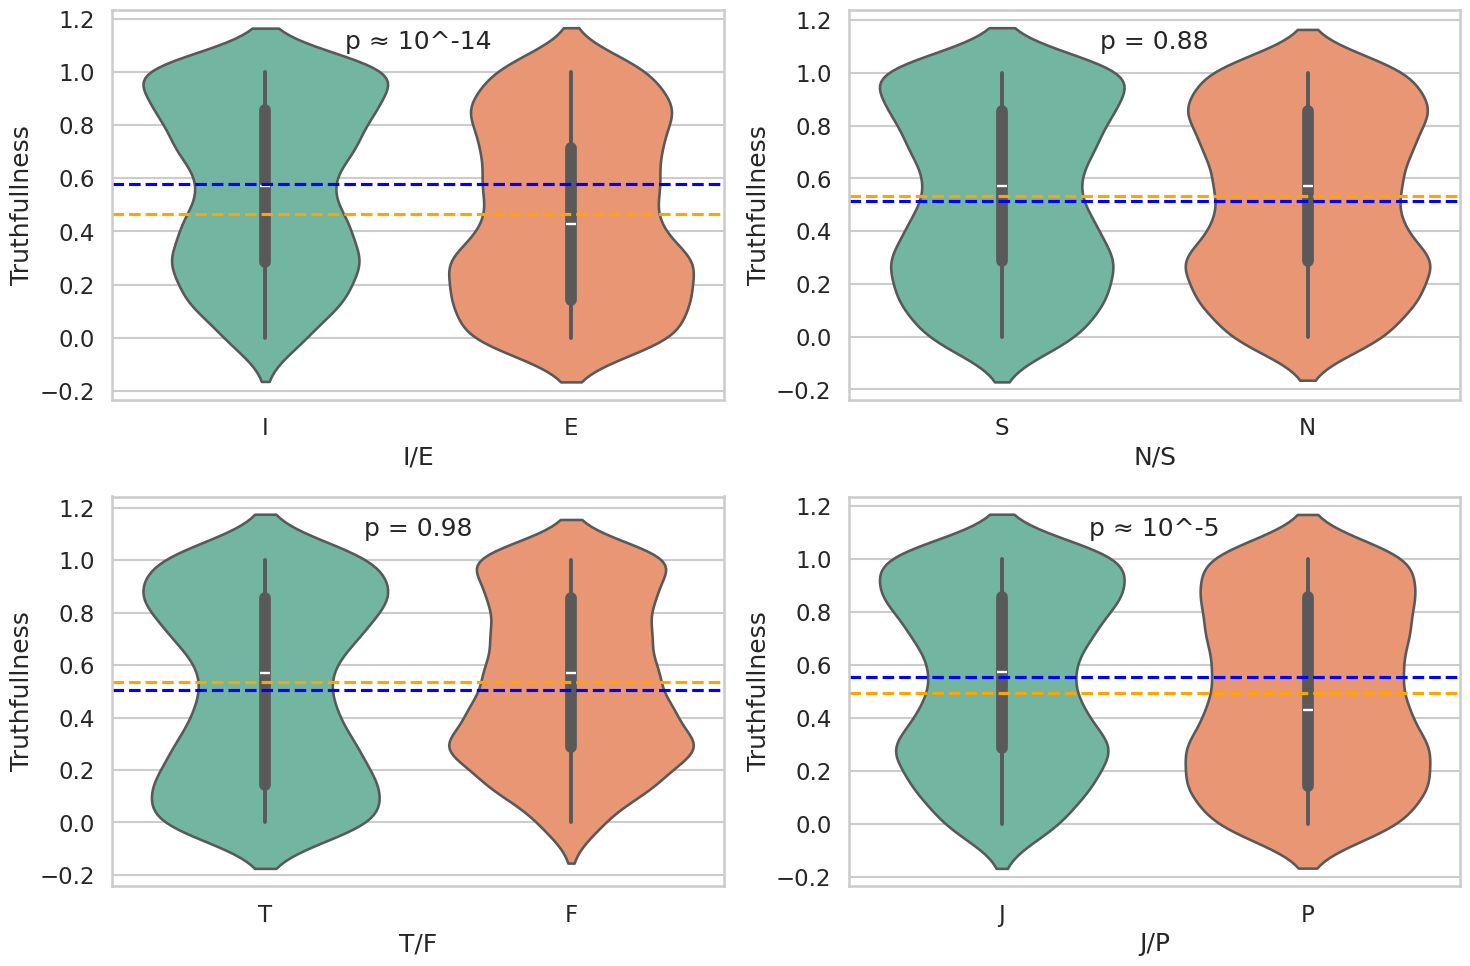

In [21]:
import numpy as np
from scipy.stats import ttest_ind

sns.set(style="whitegrid")
sns.set_context("talk")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Helper function to add exponent-style p-value label
def annotate_p(ax, p_value):
    if p_value < 1e-1:
        power = int(np.floor(np.log10(p_value)))
        ax.text(0.5, 0.9, f'p ≈ 10^{power}', transform=ax.transAxes, ha='center')
    else:
        ax.text(0.5, 0.9, f'p = {p_value:.2f}', transform=ax.transAxes, ha='center')

# I/E
sns.violinplot(x='I/E', y='Truthfullness', data=df_agents, ax=axs[0, 0], palette='Set2')
axs[0, 0].axhline(df_agents[df_agents['I/E'] == 'I']['Truthfullness'].mean(), color='blue', linestyle='--')
axs[0, 0].axhline(df_agents[df_agents['I/E'] == 'E']['Truthfullness'].mean(), color='orange', linestyle='--')
_, p = ttest_ind(df_agents[df_agents['I/E'] == 'I']['Truthfullness'], df_agents[df_agents['I/E'] == 'E']['Truthfullness'], alternative='greater', nan_policy='omit')
annotate_p(axs[0, 0], p)

# N/S
sns.violinplot(x='N/S', y='Truthfullness', data=df_agents, ax=axs[0, 1], palette='Set2')
axs[0, 1].axhline(df_agents[df_agents['N/S'] == 'N']['Truthfullness'].mean(), color='blue', linestyle='--')
axs[0, 1].axhline(df_agents[df_agents['N/S'] == 'S']['Truthfullness'].mean(), color='orange', linestyle='--')
_, p = ttest_ind(df_agents[df_agents['N/S'] == 'N']['Truthfullness'], df_agents[df_agents['N/S'] == 'S']['Truthfullness'], alternative='greater', nan_policy='omit')
annotate_p(axs[0, 1], p)

# T/F
sns.violinplot(x='T/F', y='Truthfullness', data=df_agents, ax=axs[1, 0], palette='Set2')
axs[1, 0].axhline(df_agents[df_agents['T/F'] == 'T']['Truthfullness'].mean(), color='blue', linestyle='--')
axs[1, 0].axhline(df_agents[df_agents['T/F'] == 'F']['Truthfullness'].mean(), color='orange', linestyle='--')
_, p = ttest_ind(df_agents[df_agents['T/F'] == 'T']['Truthfullness'], df_agents[df_agents['T/F'] == 'F']['Truthfullness'], alternative='greater', nan_policy='omit')
annotate_p(axs[1, 0], p)

# J/P
sns.violinplot(x='J/P', y='Truthfullness', data=df_agents, ax=axs[1, 1], palette='Set2')
axs[1, 1].axhline(df_agents[df_agents['J/P'] == 'J']['Truthfullness'].mean(), color='blue', linestyle='--')
axs[1, 1].axhline(df_agents[df_agents['J/P'] == 'P']['Truthfullness'].mean(), color='orange', linestyle='--')
_, p = ttest_ind(df_agents[df_agents['J/P'] == 'J']['Truthfullness'], df_agents[df_agents['J/P'] == 'P']['Truthfullness'], alternative='greater', nan_policy='omit')
annotate_p(axs[1, 1], p)

plt.tight_layout()
plt.savefig(plots_path + "truthfulness_violin_by_game_and_dichotomies.png")
plt.show()


In [18]:
# Create individual plots for each game with dichotomies next to each other
#sns.set(style="whitegrid")
#sns.set_context("talk")
#sns.set_palette("husl")
#
#games = df_agents['GameName'].unique()
#
#for game in games:
#    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
#    game_data = df_agents[df_agents['GameName'] == game]
#    
#    sns.violinplot(x='I/E', y='Truthfullness', data=game_data, ax=axs[0, 0])
#    axs[0, 0].set_title(f'{game} - I/E')
#    
#    sns.violinplot(x='N/S', y='Truthfullness', data=game_data, ax=axs[0, 1])
#    axs[0, 1].set_title(f'{game} - N/S')
#    
#    sns.violinplot(x='T/F', y='Truthfullness', data=game_data, ax=axs[1, 0])
#    axs[1, 0].set_title(f'{game} - T/F')
#    
#    sns.violinplot(x='J/P', y='Truthfullness', data=game_data, ax=axs[1, 1])
#    axs[1, 1].set_title(f'{game} - J/P')
#    
#    plt.tight_layout()
#    #plt.savefig(plots_path + f"truthfullness_violin_{game}_dichotomies.png")
#    plt.show()

more significant is that for each game the introverted lies less: some of the matrices or game description do make a difference in an absolute sense but relative, way less.

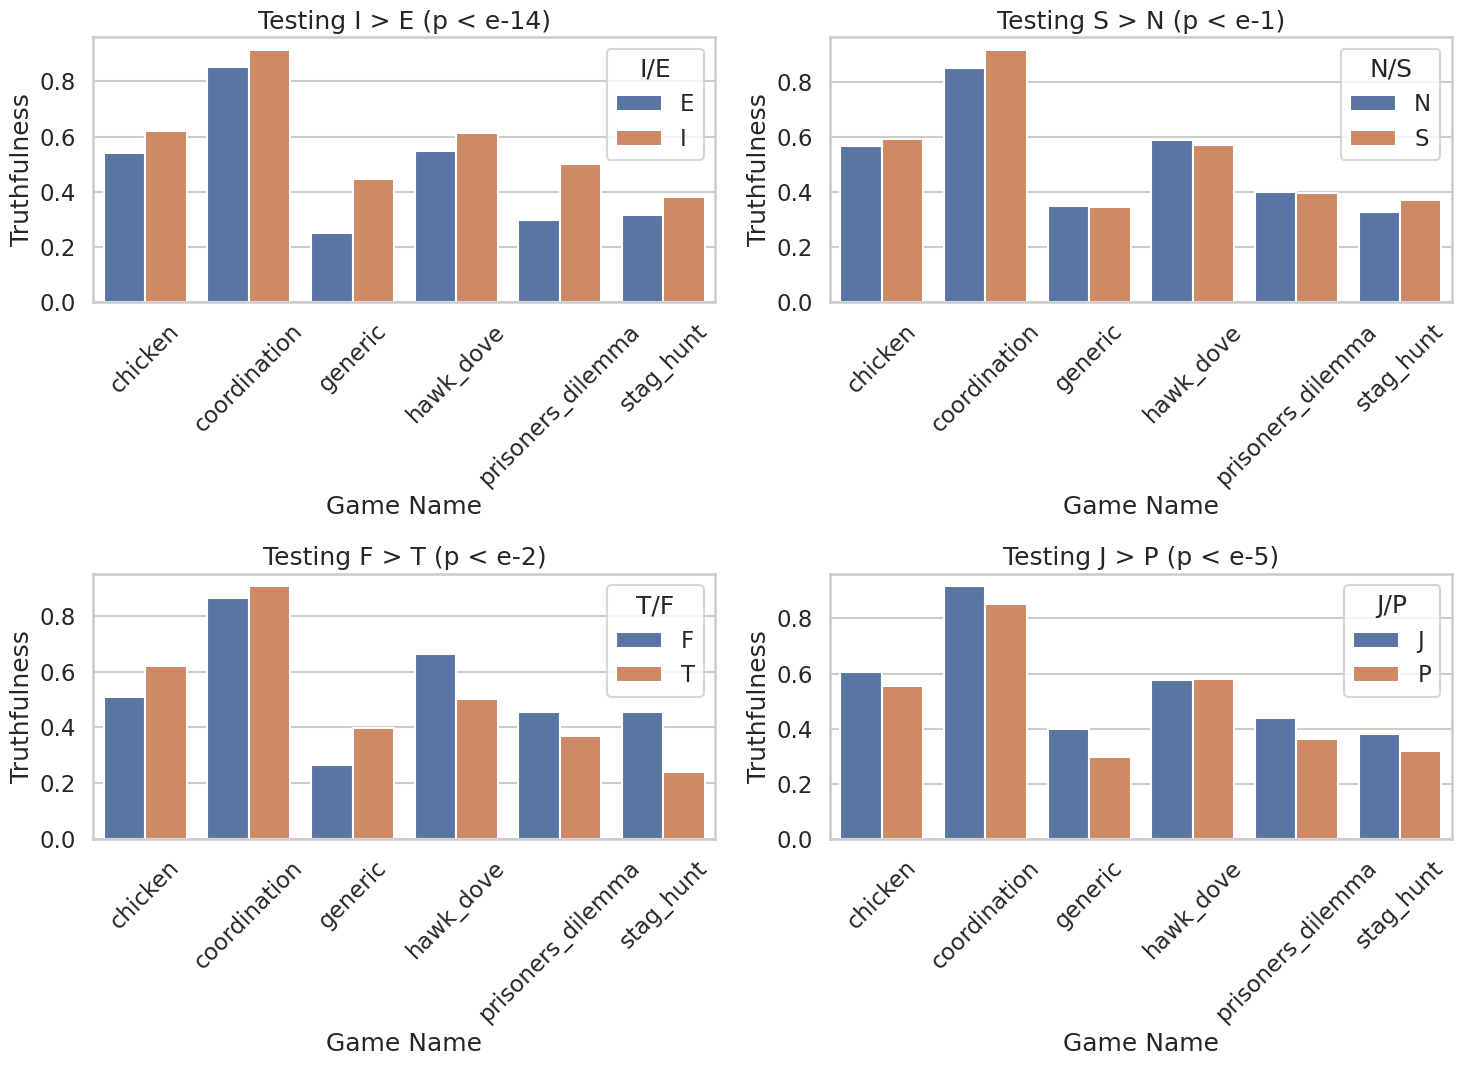

In [28]:

# Prepare the grouped data
I_E = df_agents[['GameName', 'I/E', 'Truthfullness']].groupby(['I/E', 'GameName']).mean().reset_index()
N_S = df_agents[['GameName', 'N/S', 'Truthfullness']].groupby(['N/S', 'GameName']).mean().reset_index()
T_F = df_agents[['GameName', 'T/F', 'Truthfullness']].groupby(['T/F', 'GameName']).mean().reset_index()
J_P = df_agents[['GameName', 'J/P', 'Truthfullness']].groupby(['J/P', 'GameName']).mean().reset_index()

# Combine all dichotomies into one DataFrame for plotting
df_combined = pd.concat([I_E, N_S, T_F, J_P], axis=0)

# Format p-value to scientific exponent (e.g., e-5)
def get_exponent(p):
    return f"e{int(f'{p:.1e}'.split('e')[1])}"

# Run one-sided t-test in direction of higher mean
def test_and_format(group_a_vals, group_b_vals, label_a, label_b):
    mean_a = group_a_vals.mean()
    mean_b = group_b_vals.mean()

    if mean_a >= mean_b:
        t_stat, p_val = ttest_ind(group_a_vals, group_b_vals, alternative='greater', nan_policy='omit')
        direction = f"{label_a} > {label_b}"
    else:
        t_stat, p_val = ttest_ind(group_b_vals, group_a_vals, alternative='greater', nan_policy='omit')
        direction = f"{label_b} > {label_a}"

    return p_val, direction

# Run directional tests
p_value_ie, dir_ie = test_and_format(
    df_agents[df_agents['I/E'] == 'I']['Truthfullness'],
    df_agents[df_agents['I/E'] == 'E']['Truthfullness'],
    'I', 'E'
)

p_value_ns, dir_ns = test_and_format(
    df_agents[df_agents['N/S'] == 'N']['Truthfullness'],
    df_agents[df_agents['N/S'] == 'S']['Truthfullness'],
    'N', 'S'
)

p_value_tf, dir_tf = test_and_format(
    df_agents[df_agents['T/F'] == 'T']['Truthfullness'],
    df_agents[df_agents['T/F'] == 'F']['Truthfullness'],
    'T', 'F'
)

p_value_jp, dir_jp = test_and_format(
    df_agents[df_agents['J/P'] == 'J']['Truthfullness'],
    df_agents[df_agents['J/P'] == 'P']['Truthfullness'],
    'J', 'P'
)

# Plotting
plt.figure(figsize=(15, 11))
sns.set(style="whitegrid")
sns.set_context("talk")

# I/E plot
plt.subplot(2, 2, 1)
sns.barplot(x='GameName', y='Truthfullness', hue='I/E', data=df_combined)
plt.title(f'Testing {dir_ie} (p < {get_exponent(p_value_ie)})')
plt.xlabel('Game Name')
plt.ylabel('Truthfulness')
plt.xticks(rotation=45)
plt.legend(title='I/E')

# N/S plot
plt.subplot(2, 2, 2)
sns.barplot(x='GameName', y='Truthfullness', hue='N/S', data=df_combined)
plt.title(f'Testing {dir_ns} (p < {get_exponent(p_value_ns)})')
plt.xlabel('Game Name')
plt.ylabel('Truthfulness')
plt.xticks(rotation=45)
plt.legend(title='N/S')

# T/F plot
plt.subplot(2, 2, 3)
sns.barplot(x='GameName', y='Truthfullness', hue='T/F', data=df_combined)
plt.title(f'Testing {dir_tf} (p < {get_exponent(p_value_tf)})')
plt.xlabel('Game Name')
plt.ylabel('Truthfulness')
plt.xticks(rotation=45)
plt.legend(title='T/F')

# J/P plot
plt.subplot(2, 2, 4)
sns.barplot(x='GameName', y='Truthfullness', hue='J/P', data=df_combined)
plt.title(f'Testing {dir_jp} (p < {get_exponent(p_value_jp)})')
plt.xlabel('Game Name')
plt.ylabel('Truthfulness')
plt.xticks(rotation=45)
plt.legend(title='J/P')

plt.tight_layout()
plt.savefig(plots_path + "truthfulness_by_game_and_dichotomies.png")
plt.show()

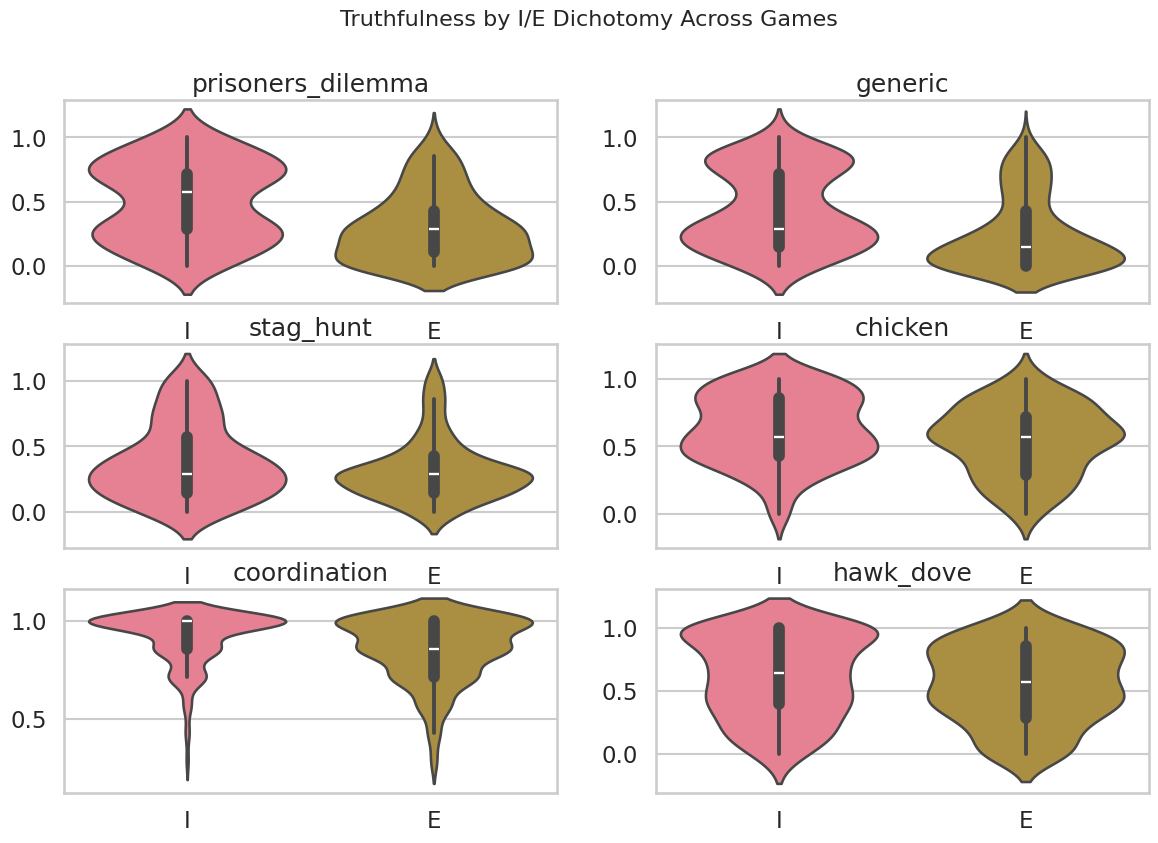

In [29]:
sns.set(style="whitegrid")
sns.set_context("talk")
sns.set_palette("husl")

games = df_agents['GameName'].unique()

# Adjust the number of rows and columns
rows = 3
cols = 2
fig, axs = plt.subplots(rows, cols, figsize=(14, 3 * rows))
axs = axs.flatten()  # Flatten the axes array for easier indexing

for i, game in enumerate(games):
    game_data = df_agents[df_agents['GameName'] == game]
    sns.violinplot(x='I/E', y='Truthfullness', data=game_data, ax=axs[i], hue='I/E', split=False)
    axs[i].set_title(game)  # Set only the game name as the subplot title
    axs[i].set_xlabel('')  # Remove x-axis label
    axs[i].set_ylabel('')  # Remove y-axis label
    #remove legend
    axs[i].legend_.remove()



# Add a common title for the whole plot
fig.suptitle("Truthfulness by I/E Dichotomy Across Games", fontsize=16)

plt.savefig(plots_path + "truthfulness_by_IE_per_game.png")
plt.show()